## 객체지향 프로그래밍

- Object-Oriented Programming, OOP
- 객체: 실생활에서 일종의 물건. 속성(Attribute)와 행동(Action)을 가짐
- OOP는 이러한 객체 개념을 프로그램으로 표현
  속성은 변수(variable), 행동은 함수(method)로 표현됨

### python naming rule

변수와 class명 함수명은 짓는 방식이 존재

- snake_case : 띄어쓰기 부분에 "_"를 추가. 뱀처럼 늘여쓰기, 파이썬 함수/변수명에 사용

  ex) professor_name

- CamelCase : 띄어쓰기 부분에 대문자를 사용. 낙타의 등 모양, 파이썬 Class명에 사용

  ex) ProfessorName

### Attribute 추가하기

Attribute 추가는 init, self와 함께! init은 객체 초기화 예약 함수

- _는 특수한 예약함수나 변수 그리고 함수명(맨글링)으로 사용

In [ ]:
# ex) __main__, __add__, __str__, __eq__

In [22]:
class SoccerPlayer(object):
    def __init__(self, name:str, position:str, back_number:int):
        self.name = name
        self.position = position
        self.back_number = back_number
        
    def change_back_number(self, new_number): # 파라미터로 self 추가
        print("선수의 등번호를 변경합니다. : From %d to %d"%\
             (self.back_number, new_number))
        self.back_number = new_number
        
    # 매직 매소드    
    def __str__(self): # print할 시 작동됨
        return "Hello, My name is %s. My back number is %d" %\
                (self.name, self.back_number)
    
    def __add__(self, other):
        return self.name + other.name

In [12]:
abc = SoccerPlayer("son","FW",7)
park = SoccerPlayer("park","WF",13)

In [13]:
abc is park

False

In [17]:
abc

In [16]:
print(abc)

Hello, My name is son. My back number is 7


In [15]:
abc+park

'sonpark'

### method 구현하기
- method(Action)추가는 기존 함수와 같으나, 반드시 self를 추가해야만 class함수로 인정됨

In [18]:
class SoccerPlayer(object):
    def change_back_number(self, new_number): # 파라미터로 self 추가
        print("선수의 등번호를 변경합니다. : From %d to %d"%\
             (self.back_number, new_number))
        self.back_number = new_number

In [21]:
jinhyun = SoccerPlayer("Jinhyun", "MF", 10)
print(jinhyun)

Hello, My name is Jinhyun. My back number is 10


In [23]:
jinhyun = SoccerPlayer("Jinhyun", "MF", 10)
print("현재 선수의 등번호는 :", jinhyun.back_number)
jinhyun.change_back_number(5)
print("현재 선수의 등번호는 :", jinhyun.back_number)

현재 선수의 등번호는 : 10
선수의 등번호를 변경합니다. : From 10 to 5
현재 선수의 등번호는 : 5


클래스 밖에서도 속성 값을 바꿀 수 있다. but 권장x

In [24]:
jinhyun.back_number=20
print(jinhyun)

Hello, My name is Jinhyun. My back number is 20


### 구현 가능한 OOP 예제
- Note를 정리하는 프로그램
- 사용자는 Note에 뭔가를 적을 수 있다.
- Note에는 Content가 있고, 내용을 제거할 수 있다.
- 두 개의 노트북을 합쳐 하나로 만들 수 있다.
- Note는 Notebook에 삽입된다.
- Notebook은 Note가 삽일 될 때 페이지를 생성하며,최고 300페이지까지 저장 가능하다
- 300 페이지가 넘으면 더 이상 노트를 삽입하지 못한다.

In [25]:
class Note(object):
    def __init__(self, content = None):
        self.content = content
    def write_content(self, content):
        self.content = content
    def remove_all(self):
        self.content = ""
    def __add__(self, other):
        return self.content + other.content
    def __str__(self):
        return self.content

In [27]:
class NoteBook(object):
    def __init__(self, title):
        self.title = title
        self.page_number = 1
        self.notes = {}
    def add_note(self, note, page = 0):
        if self.page_number < 300:
            if page == 0:
                self.notes[self.page_number] = note
                self.page_number += 1
            else:
                self.notes = {page : note}
                self.page_number += 1
        else:
            print("Page가 모두 채워졌습니다.")
    def remove_note(self, page_number):
        if page_number in self.notes.keys():
            return self.notes.pop(page_number)
        else:
            print("해당 페이지는 존재하지 않습니다")
def get_number_of_pages(self):
    return len(self.notes.keys())

### 상속
부모클래스로 부터 속성과 Method를 물려받은 자식 클래스를 생성 하는 것

In [28]:
class Person(object):
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
class Korean(Person):
    pass

first_korean = Korean("Sungchul", 35)
print(first_korean.name)

Sungchul


In [30]:
class Person(object): # 부모 클래스 Person 선언
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender
    def about_me(self): # Method 선언
        print("저의 이름은 ", self.name, "이구요, 제 나이는 ", str(self.age), "살입니다.")

In [35]:
class Employee(Person): # 부모 클래스 Person으로 부터 상속
    def __init__(self, name, age, gender, salary, hire_date):
        super().__init__(name, age, gender) # 부모객체 사용
        self.salary = salary
        self.hire_date = hire_date # 속성값 추가
    def do_work(self): # 새로운 메서드 추가
        print("열심히 일을 합니다.")
    def about_me(self): # 부모 클래스 함수 재정의
        super().about_me() # 부모 클래스 함수 사용
        print("제 급여는 ", self.salary, "원 이구요, 제 입사일은 ", self.hire_date, " 입니다.")

In [36]:
myPerson = Person("John", 34, "Male")
myEmployee = Employee("Daeho", 34, "Male", "3000000", "2012/03/01")

myEmployee.about_me()

저의 이름은  Daeho 이구요, 제 나이는  34 살입니다.
제 급여는  3000000 원 이구요, 제 입사일은  2012/03/01  입니다.


### Polymorphism(다형성)
- 같은 이름 메소드의 내부 로직을 다르게 작성
- Dynamic Typing 특성으로 인해 파이썬에서는 같은 부모클래스의 상속에서 주로 발생함
- 중요한 OOP의 개념 그러나 너무 깊이 알 필요X

In [38]:
class Animal:
    def __init__(self, name): # Constructor of the class
        self.name = name
    def talk(self): # Abstract method, defined by convention only
        raise NotImplementedError("Subclass must implement abstract method")
        
class Cat(Animal):
    def talk(self):
        return 'Meow!'

class Dog(Animal):
    def talk(self):
        return 'Woof! Woof!'

animals = [Cat('Missy'),
           Cat('Mr. Mistoffelees'),
           Dog('Lassie')]

for animal in animals:
    print(animal.name + ': ' + animal.talk())

Missy: Meow!
Mr. Mistoffelees: Meow!
Lassie: Woof! Woof!


### Visibility(가시성)
- 객체의 정보를 볼 수 있는 레벨을 조절하는 것
- 누구나 객체 안에 모든 변수를 볼 필요가 없음
    1) 객체를 사용하는 사용자가 임의로 정보 수정
    2) 필요 없는 정보에는 접근 할 필요가 없음
    3) 만약 제품으로 판매한다면? 소스의 보호
    
### Encapsulation(가시성의 다른 말)
- 캡슐화 또는 정보 은닉 (Information Hiding)
- Class를 설계할 때, 클래스 간 간섭/정보공유의 최소화
- 심판 클래스가 축구선수 클래스 가족 정보를 알아야 하나?
- 캡슐을 던지듯, 인터페이스만 알아서 써야함

#### visibility Example
- Product 객체를 Inventory 객체에 추가
- Inventory에는 오직 Product 객체만 들어감
- Inventory에 Product가 몇 개인지 확인이 필요
- Inventory에 Product items는 직접 접근이 불가

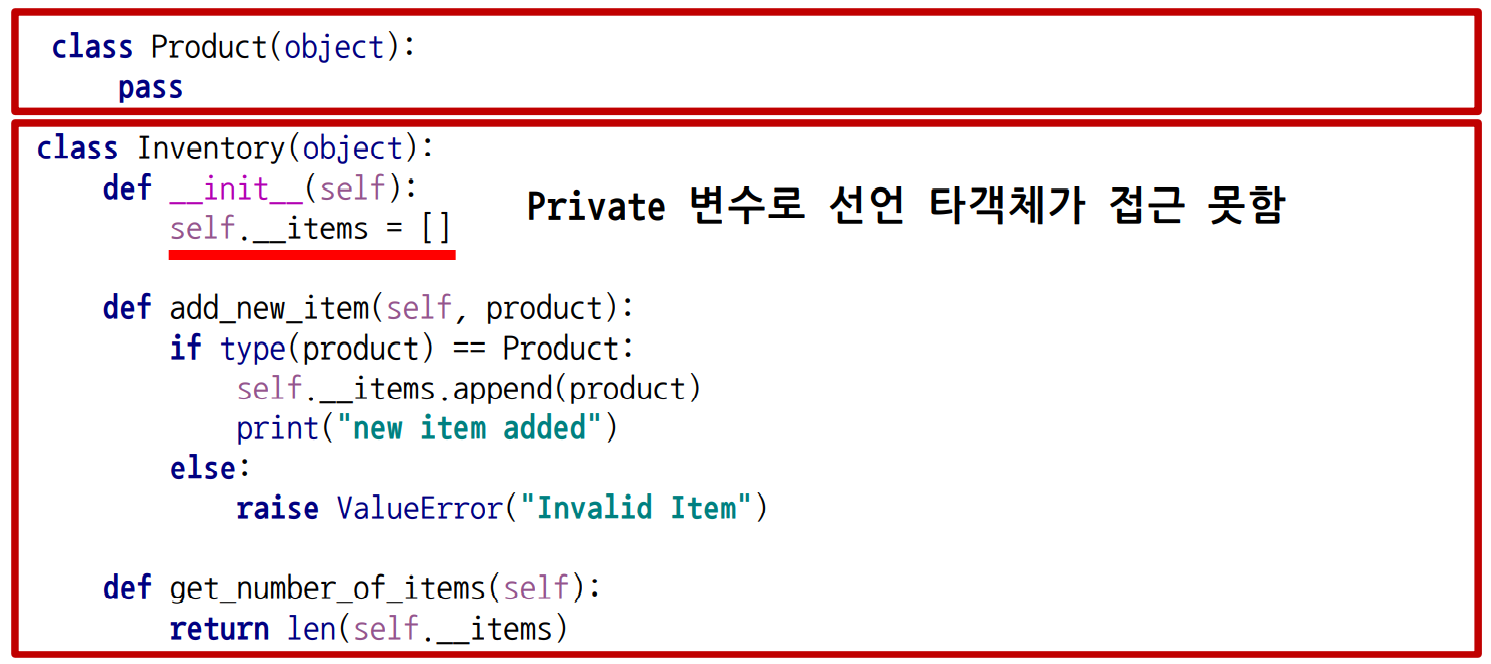

In [48]:
class Product(object):
    pass

In [75]:
class Inventory(object):
    def __init__(self):
        self.__items = []
    def add_new_item(self, product):
        if type(product) == Product:
            self.__items.append(product)
            print("new item added")
        else:
            raise ValueError("Invalid Item")
    def get_number_of_items(self):
        return len(self.__items)

In [64]:
my_inventory = Inventory()
my_inventory.add_new_item(Product())
my_inventory.add_new_item(Product())
print(my_inventory.get_number_of_items())

new item added
new item added
2


In [65]:
print(my_inventory.__items)
my_inventory.add_new_item(object)

AttributeError: 'Inventory' object has no attribute '__items'

In [ ]:
# __item을 통해 item에 대한 접근을 불가능하게 함(private 변수로 선언. 타객체가 접근 x)

decorator를 사용하여 item에 대한 접근을 가능하게 할 수 있음

In [85]:
class Inventory(object):
    def __init__(self):
        self.__items = []
        
    @property
    def items(self):
        return self.__items    
    
    def add_new_item(self, product):
        if type(product) == Product:
            self.__items.append(product)
            print("new item added")
        else:
            raise ValueError("Invalid Item")
            
    def get_number_of_items(self):
        return len(self.__items)

In [93]:
my_inventory = Inventory()
my_inventory.add_new_item(Product())
my_inventory.add_new_item(Product())
print(my_inventory.get_number_of_items())

new item added
new item added
2


In [94]:
my_inventory.items

[<__main__.Product at 0x16dd24e9820>, <__main__.Product at 0x16dd24e95b0>]

In [95]:
# Product 객체 말고 다른 객체들도 넣어줄 수 있게 됨
my_inventory.items.append("a")
my_inventory.items

# 그런데 이런 방식말고 카피를 해준다음 넣어주는게 일반적!

[<__main__.Product at 0x16dd24e9820>, <__main__.Product at 0x16dd24e95b0>, 'a']

### Decorator

#### First-class objects
- 일등함수 또는 일급 객체
- 변수나 데이터 구조에 할당이 가능한 객체
- 파라메터로 전달이 가능 + 리턴 값으로 사용

__파이썬의 함수는 일급함수 !!__

ex) map함수에서 파라미터로 함수가 사용되는 것

In [96]:
# 함수를 변수로 사용
def square(x):
    return x * x

f = square
f(5)

25

In [97]:
# 함수를 파라미터로 사용
def square(x):
    return x * x
def cube(x):
    return x*x*x
def formula(method, argument_list):
    return [method(value) for value in argument_list]

In [99]:
print(formula(square,[1,2,3,4,5]))
print(formula(cube, [1,2,3,4,5]))

[1, 4, 9, 16, 25]
[1, 8, 27, 64, 125]


- 함수 내에 또 다른 함수가 존재(많이 쓰임)

In [100]:
def print_msg(msg):
    def printer():
        print(msg)
    printer()

In [101]:
print_msg("Hello, Python")

Hello, Python


- closures : inner function을 return 값으로 변환

In [107]:
def print_msg(msg):
    def printer():
        print(msg)
    return printer

In [108]:
another = print_msg("Hello, Python")
another()

Hello, Python


In [110]:
another() # printer 함수를 리턴받기 때문에 계속 메세지를 출력가능

Hello, Python


In [111]:
def tag_func(tag, text):
    text = text
    tag = tag 
    
    def inner_func():
        return '<{0}>{1}<{0}>'.format(tag, text) 
    
    return inner_func

In [112]:
h1_func = tag_func('title', "This is Python Class") 
p_func = tag_func('p', "Data Academy") 

In [115]:
h1_func()

'<title>This is Python Class<title>'

In [116]:
p_func()

'<p>Data Academy<p>'

### decorator

In [118]:
def star(func):
    def inner(*args, **kwargs):
        print("*" * 30)
        func(*args, **kwargs)
        print("*" * 30)
    return inner

@star
def printer(msg):
    print(msg)
printer("Hello")

******************************
Hello
******************************
